In [1]:
!pip install torch torchvision numpy tqdm matplotlib pillow

In [36]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from model import Glow 

In [37]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class CIFAR10PNGDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith('.png')]
        print(f"Found {len(self.image_files)} PNG images in {root_dir}")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image


In [38]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
])


In [39]:

image_dir = "C://Users//anujb//glow-pytorch//cifar10_1//train//cat"  # <- modify as needed

dataset = CIFAR10PNGDataset(root_dir=image_dir, transform=transform)

if len(dataset) > 0:
    dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=0)
    print(f"Created dataloader with {len(dataset)} images")
else:
    raise ValueError("No PNG images found in the specified directory!")


Found 5000 PNG images in C://Users//anujb//glow-pytorch//cifar10_1//train//cat
Created dataloader with 5000 images


In [40]:
# Hyperparameters for the model
img_size = 32
n_channel = 3
n_flow = 8
n_block = 3
affine = True
conv_lu = True

model = Glow(
    n_channel,
    n_flow,
    n_block,
    affine=affine,
    conv_lu=conv_lu
)

# Move model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [41]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [44]:
import matplotlib.pyplot as plt
from tqdm import tqdm

def train(model, dataloader, optimizer, n_epochs=10):
    model.train()
    train_losses = []

    for epoch in range(n_epochs):
        print(f"\nEpoch {epoch+1}/{n_epochs}")
        epoch_loss = 0

        pbar = tqdm(dataloader)
        for i, img  in enumerate(pbar):
            img = img.to(device)

            log_p, logdet, _ = model(img)

            loss = -log_p - logdet
            loss = loss.mean()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            pbar.set_description(f"Loss: {loss.item():.4f}")

        avg_epoch_loss = epoch_loss / len(dataloader)
        train_losses.append(avg_epoch_loss)
        print(f"Epoch {epoch+1} average loss: {avg_epoch_loss:.4f}")

        # Save checkpoint every 100 epochs
        if (epoch + 1) % 100 == 0:
            torch.save(
                {'model': model.state_dict(), 'optimizer': optimizer.state_dict()},
                f'checkpoint_epoch{epoch+1}.pt'
            )
            print(f"Saved checkpoint at epoch {epoch+1}")

    # Save final model
    torch.save(
        {'model': model.state_dict(), 'optimizer': optimizer.state_dict()},
        'glow_final_model_cifar.pt'
    )
    print("Final model saved to glow_final_model_cifar.pt")

    # Plot loss
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', color='blue')
    plt.title("Epoch vs Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()



Epoch 1/500


Loss: -5411.6992: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:42<00:00,  7.41it/s]


✅ Epoch 1 average loss: -3651.9643

Epoch 2/500


Loss: -5950.7222: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.41it/s]


✅ Epoch 2 average loss: -5173.0169

Epoch 3/500


Loss: -6246.8496: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.73it/s]


✅ Epoch 3 average loss: -5636.8404

Epoch 4/500


Loss: -5309.6885: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:34<00:00,  9.06it/s]


✅ Epoch 4 average loss: -5807.5807

Epoch 5/500


Loss: -5836.5527: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.90it/s]


✅ Epoch 5 average loss: -5958.5005

Epoch 6/500


Loss: -5902.7207: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.18it/s]


✅ Epoch 6 average loss: -5973.9820

Epoch 7/500


Loss: -6955.4116: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.46it/s]


✅ Epoch 7 average loss: -6158.1068

Epoch 8/500


Loss: -5438.5200: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.31it/s]


✅ Epoch 8 average loss: -6196.1828

Epoch 9/500


Loss: -7169.6587: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.46it/s]


✅ Epoch 9 average loss: -6252.4293

Epoch 10/500


Loss: -7262.7725: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.50it/s]


✅ Epoch 10 average loss: -6316.0536

Epoch 11/500


Loss: -6743.0303: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.08it/s]


✅ Epoch 11 average loss: -6357.6903

Epoch 12/500


Loss: -5914.2432: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.55it/s]


✅ Epoch 12 average loss: -6397.9189

Epoch 13/500


Loss: -6159.0156: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.48it/s]


✅ Epoch 13 average loss: -6441.1462

Epoch 14/500


Loss: -5866.0586: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.46it/s]


✅ Epoch 14 average loss: -6492.6657

Epoch 15/500


Loss: -6503.6147: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.35it/s]


✅ Epoch 15 average loss: -6490.6955

Epoch 16/500


Loss: -7609.6865: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.76it/s]


✅ Epoch 16 average loss: -6543.9923

Epoch 17/500


Loss: -6152.2715: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.57it/s]


✅ Epoch 17 average loss: -6552.1473

Epoch 18/500


Loss: -6916.3931: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.02it/s]


✅ Epoch 18 average loss: -6598.1322

Epoch 19/500


Loss: -5917.1348: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.18it/s]


✅ Epoch 19 average loss: -6633.8048

Epoch 20/500


Loss: -7020.6470: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.63it/s]


✅ Epoch 20 average loss: -6637.9079

Epoch 21/500


Loss: -6588.1636: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.19it/s]


✅ Epoch 21 average loss: -6672.5494

Epoch 22/500


Loss: -6315.4604: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.80it/s]


✅ Epoch 22 average loss: -6703.7900

Epoch 23/500


Loss: -6739.5972: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:34<00:00,  9.13it/s]


✅ Epoch 23 average loss: -6739.8630

Epoch 24/500


Loss: -6946.1982: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.42it/s]


✅ Epoch 24 average loss: -6754.7241

Epoch 25/500


Loss: -6971.3418: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.40it/s]


✅ Epoch 25 average loss: -6793.1251

Epoch 26/500


Loss: -7050.1250: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.07it/s]


✅ Epoch 26 average loss: -6802.8759

Epoch 27/500


Loss: -6097.4375: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.39it/s]


✅ Epoch 27 average loss: -6815.0169

Epoch 28/500


Loss: -6565.2954: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.57it/s]


✅ Epoch 28 average loss: -6854.2414

Epoch 29/500


Loss: -6597.9248: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.61it/s]


✅ Epoch 29 average loss: -6856.0027

Epoch 30/500


Loss: -6170.1904: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.81it/s]


✅ Epoch 30 average loss: -6904.7870

Epoch 31/500


Loss: -6479.2446: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.20it/s]


✅ Epoch 31 average loss: -6907.2720

Epoch 32/500


Loss: -6612.4551: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.22it/s]


✅ Epoch 32 average loss: -6933.6123

Epoch 33/500


Loss: -7210.2568: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.62it/s]


✅ Epoch 33 average loss: -6930.9909

Epoch 34/500


Loss: -7083.1128: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.13it/s]


✅ Epoch 34 average loss: -6974.1920

Epoch 35/500


Loss: -6067.7373: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.74it/s]


✅ Epoch 35 average loss: -6968.8077

Epoch 36/500


Loss: -7690.9941: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.86it/s]


✅ Epoch 36 average loss: -7000.4514

Epoch 37/500


Loss: -6467.1699: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.24it/s]


✅ Epoch 37 average loss: -7029.3057

Epoch 38/500


Loss: -6772.9902: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.38it/s]


✅ Epoch 38 average loss: -7048.5226

Epoch 39/500


Loss: -7271.4131: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.11it/s]


✅ Epoch 39 average loss: -7064.7688

Epoch 40/500


Loss: -6600.4785: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.28it/s]


✅ Epoch 40 average loss: -7071.7911

Epoch 41/500


Loss: -7524.4102: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.38it/s]


✅ Epoch 41 average loss: -7106.2021

Epoch 42/500


Loss: -6779.8784: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.81it/s]


✅ Epoch 42 average loss: -7096.2673

Epoch 43/500


Loss: -6901.6357: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.78it/s]


✅ Epoch 43 average loss: -7129.2234

Epoch 44/500


Loss: -7729.0947: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.89it/s]


✅ Epoch 44 average loss: -7155.9011

Epoch 45/500


Loss: -7576.0137: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.10it/s]


✅ Epoch 45 average loss: -7159.3215

Epoch 46/500


Loss: -7697.8394: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.90it/s]


✅ Epoch 46 average loss: -7173.0253

Epoch 47/500


Loss: -7464.1445: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.17it/s]


✅ Epoch 47 average loss: -7188.1545

Epoch 48/500


Loss: -7011.0874: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.89it/s]


✅ Epoch 48 average loss: -7214.8534

Epoch 49/500


Loss: -6229.0420: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.76it/s]


✅ Epoch 49 average loss: -7215.6192

Epoch 50/500


Loss: -6322.4023: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.93it/s]


✅ Epoch 50 average loss: -7234.4619

Epoch 51/500


Loss: -7408.4072: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.24it/s]


✅ Epoch 51 average loss: -7262.7820

Epoch 52/500


Loss: -8168.8691: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.40it/s]


✅ Epoch 52 average loss: -7254.7226

Epoch 53/500


Loss: -7465.3413: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.98it/s]


✅ Epoch 53 average loss: -7270.8009

Epoch 54/500


Loss: -7164.4385: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.84it/s]


✅ Epoch 54 average loss: -7296.4044

Epoch 55/500


Loss: -6926.7344: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.45it/s]


✅ Epoch 55 average loss: -7276.9785

Epoch 56/500


Loss: -7259.6943: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.03it/s]


✅ Epoch 56 average loss: -7303.5692

Epoch 57/500


Loss: -7165.9209: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.25it/s]


✅ Epoch 57 average loss: -7324.8363

Epoch 58/500


Loss: -7625.6514: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.11it/s]


✅ Epoch 58 average loss: -7337.8893

Epoch 59/500


Loss: -6718.7656: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.00it/s]


✅ Epoch 59 average loss: -7347.3666

Epoch 60/500


Loss: -6925.3184: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.32it/s]


✅ Epoch 60 average loss: -7364.4987

Epoch 61/500


Loss: -7466.5537: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.63it/s]


✅ Epoch 61 average loss: -7380.1314

Epoch 62/500


Loss: -7323.5332: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:34<00:00,  8.95it/s]


✅ Epoch 62 average loss: -7365.7233

Epoch 63/500


Loss: -7003.4077: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.15it/s]


✅ Epoch 63 average loss: -7390.0011

Epoch 64/500


Loss: -7331.4058: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.05it/s]


✅ Epoch 64 average loss: -7410.9639

Epoch 65/500


Loss: -7232.5166: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.68it/s]


✅ Epoch 65 average loss: -7420.1772

Epoch 66/500


Loss: -7312.1450: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.19it/s]


✅ Epoch 66 average loss: -7414.2696

Epoch 67/500


Loss: -7584.7021: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.72it/s]


✅ Epoch 67 average loss: -7431.8319

Epoch 68/500


Loss: -7647.8809: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.79it/s]


✅ Epoch 68 average loss: -7428.7478

Epoch 69/500


Loss: -7361.1094: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.08it/s]


✅ Epoch 69 average loss: -7431.7373

Epoch 70/500


Loss: -6813.4819: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.37it/s]


✅ Epoch 70 average loss: -7469.0371

Epoch 71/500


Loss: -7427.0459: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.40it/s]


✅ Epoch 71 average loss: -7459.1768

Epoch 72/500


Loss: -7790.0615: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.33it/s]


✅ Epoch 72 average loss: -7481.9121

Epoch 73/500


Loss: -7247.9805: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.09it/s]


✅ Epoch 73 average loss: -7472.4940

Epoch 74/500


Loss: -7952.5576: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.64it/s]


✅ Epoch 74 average loss: -7501.0890

Epoch 75/500


Loss: -7549.4424: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.52it/s]


✅ Epoch 75 average loss: -7495.1418

Epoch 76/500


Loss: -6913.4004: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.95it/s]


✅ Epoch 76 average loss: -7509.7244

Epoch 77/500


Loss: -7824.2490: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:40<00:00,  7.81it/s]


✅ Epoch 77 average loss: -7518.6770

Epoch 78/500


Loss: -7820.1006: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.48it/s]


✅ Epoch 78 average loss: -7526.2072

Epoch 79/500


Loss: -7073.8838: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.30it/s]


✅ Epoch 79 average loss: -7541.3891

Epoch 80/500


Loss: -6442.1660: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.63it/s]


✅ Epoch 80 average loss: -7547.4790

Epoch 81/500


Loss: -7406.0737: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:34<00:00,  9.05it/s]


✅ Epoch 81 average loss: -7555.0752

Epoch 82/500


Loss: -7025.3447: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.89it/s]


✅ Epoch 82 average loss: -7569.2087

Epoch 83/500


Loss: -7673.2842: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.03it/s]


✅ Epoch 83 average loss: -7565.3444

Epoch 84/500


Loss: -7658.5479: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.28it/s]


✅ Epoch 84 average loss: -7552.7445

Epoch 85/500


Loss: -8083.1748: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.20it/s]


✅ Epoch 85 average loss: -7588.4654

Epoch 86/500


Loss: -7412.2275: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.46it/s]


✅ Epoch 86 average loss: -7592.9211

Epoch 87/500


Loss: -7030.3037: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.76it/s]


✅ Epoch 87 average loss: -7591.8646

Epoch 88/500


Loss: -7106.6973: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.19it/s]


✅ Epoch 88 average loss: -7611.4500

Epoch 89/500


Loss: -8108.9785: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.20it/s]


✅ Epoch 89 average loss: -7620.3366

Epoch 90/500


Loss: -7809.4375: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:40<00:00,  7.82it/s]


✅ Epoch 90 average loss: -7610.6209

Epoch 91/500


Loss: -6807.7183: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.94it/s]


✅ Epoch 91 average loss: -7618.8952

Epoch 92/500


Loss: -8265.9102: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:55<00:00,  5.60it/s]


✅ Epoch 92 average loss: -7630.1584

Epoch 93/500


Loss: -7118.8965: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:41<00:00,  7.63it/s]


✅ Epoch 93 average loss: -7620.0325

Epoch 94/500


Loss: -7776.4116: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:40<00:00,  7.80it/s]


✅ Epoch 94 average loss: -7647.5833

Epoch 95/500


Loss: -8267.0918: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.93it/s]


✅ Epoch 95 average loss: -7661.8408

Epoch 96/500


Loss: -7763.1992: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.26it/s]


✅ Epoch 96 average loss: -7659.7511

Epoch 97/500


Loss: -7469.6338: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.16it/s]


✅ Epoch 97 average loss: -7667.2717

Epoch 98/500


Loss: -7872.3379: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.44it/s]


✅ Epoch 98 average loss: -7665.8434

Epoch 99/500


Loss: -7734.0898: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.62it/s]


✅ Epoch 99 average loss: -7685.7272

Epoch 100/500


Loss: -7077.3984: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.29it/s]


✅ Epoch 100 average loss: -7689.3986
📦 Saved checkpoint at epoch 100

Epoch 101/500


Loss: -7962.0977: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.90it/s]


✅ Epoch 101 average loss: -7693.6138

Epoch 102/500


Loss: -8026.1553: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.99it/s]


✅ Epoch 102 average loss: -7697.9461

Epoch 103/500


Loss: -7316.0908: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.22it/s]


✅ Epoch 103 average loss: -7706.7849

Epoch 104/500


Loss: -7457.3594: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.55it/s]


✅ Epoch 104 average loss: -7700.3028

Epoch 105/500


Loss: -8046.3496: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.87it/s]


✅ Epoch 105 average loss: -7702.3087

Epoch 106/500


Loss: -8686.8691: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.22it/s]


✅ Epoch 106 average loss: -7732.7484

Epoch 107/500


Loss: -7249.8711: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.09it/s]


✅ Epoch 107 average loss: -7714.2038

Epoch 108/500


Loss: -7726.7148: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.90it/s]


✅ Epoch 108 average loss: -7743.4522

Epoch 109/500


Loss: -7233.6353: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.21it/s]


✅ Epoch 109 average loss: -7725.8127

Epoch 110/500


Loss: -7811.3491: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.30it/s]


✅ Epoch 110 average loss: -7757.3964

Epoch 111/500


Loss: -7821.0962: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.69it/s]


✅ Epoch 111 average loss: -7763.1956

Epoch 112/500


Loss: -8278.9141: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:34<00:00,  8.95it/s]


✅ Epoch 112 average loss: -7752.4525

Epoch 113/500


Loss: -8161.9707: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.87it/s]


✅ Epoch 113 average loss: -7773.1005

Epoch 114/500


Loss: -7057.7822: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.18it/s]


✅ Epoch 114 average loss: -7755.5070

Epoch 115/500


Loss: -8557.3232: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.33it/s]


✅ Epoch 115 average loss: -7775.0612

Epoch 116/500


Loss: -7766.4307: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.31it/s]


✅ Epoch 116 average loss: -7778.3997

Epoch 117/500


Loss: -7885.8818: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.71it/s]


✅ Epoch 117 average loss: -7778.2833

Epoch 118/500


Loss: -7698.8125: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.88it/s]


✅ Epoch 118 average loss: -7794.2795

Epoch 119/500


Loss: -8188.7549: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.36it/s]


✅ Epoch 119 average loss: -7793.1531

Epoch 120/500


Loss: -7894.1899: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.21it/s]


✅ Epoch 120 average loss: -7810.2616

Epoch 121/500


Loss: -7686.5859: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.08it/s]


✅ Epoch 121 average loss: -7804.9629

Epoch 122/500


Loss: -7983.1670: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.55it/s]


✅ Epoch 122 average loss: -7795.8501

Epoch 123/500


Loss: -8160.8105: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.33it/s]


✅ Epoch 123 average loss: -7813.1384

Epoch 124/500


Loss: -7509.6611: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.63it/s]


✅ Epoch 124 average loss: -7824.2679

Epoch 125/500


Loss: -7502.3838: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:34<00:00,  9.01it/s]


✅ Epoch 125 average loss: -7817.0055

Epoch 126/500


Loss: -7602.5762: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:40<00:00,  7.76it/s]


✅ Epoch 126 average loss: -7841.0516

Epoch 127/500


Loss: -7271.3901: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.96it/s]


✅ Epoch 127 average loss: -7831.5327

Epoch 128/500


Loss: -8571.8887: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.17it/s]


✅ Epoch 128 average loss: -7848.8048

Epoch 129/500


Loss: -8015.6475: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.04it/s]


✅ Epoch 129 average loss: -7848.9182

Epoch 130/500


Loss: -7811.6143: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.57it/s]


✅ Epoch 130 average loss: -7847.5900

Epoch 131/500


Loss: -7120.5713: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.82it/s]


✅ Epoch 131 average loss: -7840.6215

Epoch 132/500


Loss: -7895.0356: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.18it/s]


✅ Epoch 132 average loss: -7870.2288

Epoch 133/500


Loss: -7797.9209: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.24it/s]


✅ Epoch 133 average loss: -7854.9964

Epoch 134/500


Loss: -8354.2861: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.18it/s]


✅ Epoch 134 average loss: -7875.1542

Epoch 135/500


Loss: -8154.8682: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.26it/s]


✅ Epoch 135 average loss: -7883.5654

Epoch 136/500


Loss: -6790.6768: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.35it/s]


✅ Epoch 136 average loss: -7883.4616

Epoch 137/500


Loss: -8148.1484: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.57it/s]


✅ Epoch 137 average loss: -7875.2813

Epoch 138/500


Loss: -8178.3994: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.64it/s]


✅ Epoch 138 average loss: -7884.6522

Epoch 139/500


Loss: -7892.3193: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.04it/s]


✅ Epoch 139 average loss: -7894.3701

Epoch 140/500


Loss: -8056.4233: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.03it/s]


✅ Epoch 140 average loss: -7900.1053

Epoch 141/500


Loss: -7412.9106: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.30it/s]


✅ Epoch 141 average loss: -7899.9632

Epoch 142/500


Loss: -7471.4180: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.35it/s]


✅ Epoch 142 average loss: -7892.7743

Epoch 143/500


Loss: -8001.6392: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.50it/s]


✅ Epoch 143 average loss: -7917.1845

Epoch 144/500


Loss: -8277.1172: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.94it/s]


✅ Epoch 144 average loss: -7922.3400

Epoch 145/500


Loss: -7892.8589: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.97it/s]


✅ Epoch 145 average loss: -7926.6197

Epoch 146/500


Loss: -7522.1748: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.30it/s]


✅ Epoch 146 average loss: -7917.5264

Epoch 147/500


Loss: -8912.6055: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.18it/s]


✅ Epoch 147 average loss: -7909.0635

Epoch 148/500


Loss: -7799.1123: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.06it/s]


✅ Epoch 148 average loss: -7941.3192

Epoch 149/500


Loss: -7811.4111: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.61it/s]


✅ Epoch 149 average loss: -7937.4725

Epoch 150/500


Loss: -7768.5347: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.62it/s]


✅ Epoch 150 average loss: -7936.0468

Epoch 151/500


Loss: -7701.9756: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.18it/s]


✅ Epoch 151 average loss: -7955.9337

Epoch 152/500


Loss: -8060.8950: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.94it/s]


✅ Epoch 152 average loss: -7941.0311

Epoch 153/500


Loss: -7848.9805: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.06it/s]


✅ Epoch 153 average loss: -7958.7689

Epoch 154/500


Loss: -7387.1777: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.27it/s]


✅ Epoch 154 average loss: -7963.7554

Epoch 155/500


Loss: -8042.2026: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.47it/s]


✅ Epoch 155 average loss: -7967.9659

Epoch 156/500


Loss: -7972.5151: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.64it/s]


✅ Epoch 156 average loss: -7963.6577

Epoch 157/500


Loss: -7641.8672: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.79it/s]


✅ Epoch 157 average loss: -7974.5350

Epoch 158/500


Loss: -7684.6743: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.87it/s]


✅ Epoch 158 average loss: -7966.3283

Epoch 159/500


Loss: -7566.8735: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.89it/s]


✅ Epoch 159 average loss: -7985.7818

Epoch 160/500


Loss: -7838.4355: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.41it/s]


✅ Epoch 160 average loss: -7970.6860

Epoch 161/500


Loss: -7994.1968: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.17it/s]


✅ Epoch 161 average loss: -7985.7893

Epoch 162/500


Loss: -7757.4395: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.63it/s]


✅ Epoch 162 average loss: -7996.1782

Epoch 163/500


Loss: -8528.4951: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.84it/s]


✅ Epoch 163 average loss: -7989.7541

Epoch 164/500


Loss: -8562.6670: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.96it/s]


✅ Epoch 164 average loss: -7999.9092

Epoch 165/500


Loss: -7894.3628: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.13it/s]


✅ Epoch 165 average loss: -8008.1982

Epoch 166/500


Loss: -7927.6782: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.36it/s]


✅ Epoch 166 average loss: -8004.2000

Epoch 167/500


Loss: -8555.8594: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.20it/s]


✅ Epoch 167 average loss: -8019.7349

Epoch 168/500


Loss: -7926.2964: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.48it/s]


✅ Epoch 168 average loss: -8021.1549

Epoch 169/500


Loss: -8173.2915: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.69it/s]


✅ Epoch 169 average loss: -8013.5961

Epoch 170/500


Loss: -7435.3799: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.59it/s]


✅ Epoch 170 average loss: -8022.8829

Epoch 171/500


Loss: -7477.3154: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.00it/s]


✅ Epoch 171 average loss: -8026.7814

Epoch 172/500


Loss: -7390.9238: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.95it/s]


✅ Epoch 172 average loss: -8021.0452

Epoch 173/500


Loss: -8238.9961: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.56it/s]


✅ Epoch 173 average loss: -8044.9036

Epoch 174/500


Loss: -8481.3789: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.35it/s]


✅ Epoch 174 average loss: -8039.4626

Epoch 175/500


Loss: -8135.4639: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.37it/s]


✅ Epoch 175 average loss: -8040.7823

Epoch 176/500


Loss: -7833.6074: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.82it/s]


✅ Epoch 176 average loss: -8033.7160

Epoch 177/500


Loss: -7777.0039: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.89it/s]


✅ Epoch 177 average loss: -8050.9628

Epoch 178/500


Loss: -7727.6035: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.98it/s]


✅ Epoch 178 average loss: -8042.5894

Epoch 179/500


Loss: -8130.6270: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.92it/s]


✅ Epoch 179 average loss: -8060.8579

Epoch 180/500


Loss: -7906.2769: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.15it/s]


✅ Epoch 180 average loss: -8055.7364

Epoch 181/500


Loss: -8000.7231: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.65it/s]


✅ Epoch 181 average loss: -8064.3102

Epoch 182/500


Loss: -7901.2793: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.70it/s]


✅ Epoch 182 average loss: -8066.8737

Epoch 183/500


Loss: -8174.2783: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.00it/s]


✅ Epoch 183 average loss: -8068.1895

Epoch 184/500


Loss: -7790.7793: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.04it/s]


✅ Epoch 184 average loss: -8070.9178

Epoch 185/500


Loss: -8039.5239: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.08it/s]


✅ Epoch 185 average loss: -8072.8803

Epoch 186/500


Loss: -7637.4561: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.29it/s]


✅ Epoch 186 average loss: -8067.4106

Epoch 187/500


Loss: -7674.3936: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.49it/s]


✅ Epoch 187 average loss: -8092.0892

Epoch 188/500


Loss: -8551.1445: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.82it/s]


✅ Epoch 188 average loss: -8094.5921

Epoch 189/500


Loss: -8212.3574: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.51it/s]


✅ Epoch 189 average loss: -8099.1439

Epoch 190/500


Loss: -8534.0078: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.83it/s]


✅ Epoch 190 average loss: -8077.7333

Epoch 191/500


Loss: -8424.5889: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:40<00:00,  7.80it/s]


✅ Epoch 191 average loss: -8095.3762

Epoch 192/500


Loss: -8561.5176: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.46it/s]


✅ Epoch 192 average loss: -8093.6994

Epoch 193/500


Loss: -8014.2217: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.46it/s]


✅ Epoch 193 average loss: -8113.2330

Epoch 194/500


Loss: -7954.8276: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.63it/s]


✅ Epoch 194 average loss: -8111.1946

Epoch 195/500


Loss: -8085.4385: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:34<00:00,  9.12it/s]


✅ Epoch 195 average loss: -8104.0267

Epoch 196/500


Loss: -8358.9756: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.86it/s]


✅ Epoch 196 average loss: -8117.5478

Epoch 197/500


Loss: -8304.3213: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.10it/s]


✅ Epoch 197 average loss: -8119.4314

Epoch 198/500


Loss: -8260.8652: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.47it/s]


✅ Epoch 198 average loss: -8109.6867

Epoch 199/500


Loss: -7906.2378: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.04it/s]


✅ Epoch 199 average loss: -8121.0610

Epoch 200/500


Loss: -8021.6763: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.65it/s]


✅ Epoch 200 average loss: -8116.1970
📦 Saved checkpoint at epoch 200

Epoch 201/500


Loss: -8791.2988: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.48it/s]


✅ Epoch 201 average loss: -8127.0711

Epoch 202/500


Loss: -9164.6113: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.29it/s]


✅ Epoch 202 average loss: -8132.5672

Epoch 203/500


Loss: -8882.3867: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.17it/s]


✅ Epoch 203 average loss: -8136.1319

Epoch 204/500


Loss: -8072.3784: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.21it/s]


✅ Epoch 204 average loss: -8142.5857

Epoch 205/500


Loss: -8790.8613: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.33it/s]


✅ Epoch 205 average loss: -8147.2439

Epoch 206/500


Loss: -8264.5127: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.34it/s]


✅ Epoch 206 average loss: -8133.5847

Epoch 207/500


Loss: -8437.8799: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.57it/s]


✅ Epoch 207 average loss: -8151.1289

Epoch 208/500


Loss: -8439.4023: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.53it/s]


✅ Epoch 208 average loss: -8144.9453

Epoch 209/500


Loss: -8456.4629: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.94it/s]


✅ Epoch 209 average loss: -8160.8185

Epoch 210/500


Loss: -8456.6396: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.05it/s]


✅ Epoch 210 average loss: -8158.0903

Epoch 211/500


Loss: -8599.1211: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.44it/s]


✅ Epoch 211 average loss: -8165.3796

Epoch 212/500


Loss: -7796.5508: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.25it/s]


✅ Epoch 212 average loss: -8165.1356

Epoch 213/500


Loss: -8163.8223: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.64it/s]


✅ Epoch 213 average loss: -8158.8611

Epoch 214/500


Loss: -8646.9277: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.86it/s]


✅ Epoch 214 average loss: -8179.8498

Epoch 215/500


Loss: -7841.5146: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.95it/s]


✅ Epoch 215 average loss: -8163.2536

Epoch 216/500


Loss: -8609.9424: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.17it/s]


✅ Epoch 216 average loss: -8185.7736

Epoch 217/500


Loss: -8509.3672: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:40<00:00,  7.76it/s]


✅ Epoch 217 average loss: -8192.7787

Epoch 218/500


Loss: -8446.0625: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.00it/s]


✅ Epoch 218 average loss: -8181.4475

Epoch 219/500


Loss: -8175.7080: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.69it/s]


✅ Epoch 219 average loss: -8189.7241

Epoch 220/500


Loss: -7773.5654: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:34<00:00,  9.02it/s]


✅ Epoch 220 average loss: -8206.3004

Epoch 221/500


Loss: -7935.5518: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.37it/s]


✅ Epoch 221 average loss: -8191.1622

Epoch 222/500


Loss: -8197.0596: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.11it/s]


✅ Epoch 222 average loss: -8212.8269

Epoch 223/500


Loss: -8879.1035: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.85it/s]


✅ Epoch 223 average loss: -8195.2131

Epoch 224/500


Loss: -7427.0176: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.26it/s]


✅ Epoch 224 average loss: -8202.1035

Epoch 225/500


Loss: -8369.1064: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.30it/s]


✅ Epoch 225 average loss: -8204.6583

Epoch 226/500


Loss: -8769.9512: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.66it/s]


✅ Epoch 226 average loss: -8218.6575

Epoch 227/500


Loss: -8641.9570: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.86it/s]


✅ Epoch 227 average loss: -8210.8758

Epoch 228/500


Loss: -8346.5244: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.99it/s]


✅ Epoch 228 average loss: -8209.0068

Epoch 229/500


Loss: -8164.1343: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.24it/s]


✅ Epoch 229 average loss: -8210.7874

Epoch 230/500


Loss: -8133.1924: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.64it/s]


✅ Epoch 230 average loss: -8222.2729

Epoch 231/500


Loss: -7953.2676: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.01it/s]


✅ Epoch 231 average loss: -8221.6025

Epoch 232/500


Loss: -7708.7622: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.25it/s]


✅ Epoch 232 average loss: -8216.0990

Epoch 233/500


Loss: -8132.9346: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.85it/s]


✅ Epoch 233 average loss: -8224.8824

Epoch 234/500


Loss: -8372.7217: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.03it/s]


✅ Epoch 234 average loss: -8229.9152

Epoch 235/500


Loss: -7191.6187: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.35it/s]


✅ Epoch 235 average loss: -8215.7257

Epoch 236/500


Loss: -8318.0244: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.19it/s]


✅ Epoch 236 average loss: -8243.0928

Epoch 237/500


Loss: -8308.7549: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.26it/s]


✅ Epoch 237 average loss: -8225.4752

Epoch 238/500


Loss: -7777.8408: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.30it/s]


✅ Epoch 238 average loss: -8238.4918

Epoch 239/500


Loss: -8955.7012: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.45it/s]


✅ Epoch 239 average loss: -8251.5307

Epoch 240/500


Loss: -7969.2080: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.98it/s]


✅ Epoch 240 average loss: -8248.7524

Epoch 241/500


Loss: -8100.7139: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.99it/s]


✅ Epoch 241 average loss: -8247.5847

Epoch 242/500


Loss: -8150.9199: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.13it/s]


✅ Epoch 242 average loss: -8254.4623

Epoch 243/500


Loss: -8484.5449: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.40it/s]


✅ Epoch 243 average loss: -8264.3476

Epoch 244/500


Loss: -8598.8662: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.21it/s]


✅ Epoch 244 average loss: -8259.8375

Epoch 245/500


Loss: -8591.4688: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.69it/s]


✅ Epoch 245 average loss: -8260.3701

Epoch 246/500


Loss: -8237.6406: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:34<00:00,  9.03it/s]


✅ Epoch 246 average loss: -8262.8710

Epoch 247/500


Loss: -8148.2114: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:40<00:00,  7.78it/s]


✅ Epoch 247 average loss: -8266.1631

Epoch 248/500


Loss: -8021.0093: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.01it/s]


✅ Epoch 248 average loss: -8275.2531

Epoch 249/500


Loss: -7585.2334: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.10it/s]


✅ Epoch 249 average loss: -8258.1593

Epoch 250/500


Loss: -8028.0283: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.13it/s]


✅ Epoch 250 average loss: -8276.6992

Epoch 251/500


Loss: -8275.6523: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.66it/s]


✅ Epoch 251 average loss: -8282.1476

Epoch 252/500


Loss: -7429.3447: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.34it/s]


✅ Epoch 252 average loss: -8282.2519

Epoch 253/500


Loss: -8605.3350: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.00it/s]


✅ Epoch 253 average loss: -8273.0897

Epoch 254/500


Loss: -8536.4980: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.42it/s]


✅ Epoch 254 average loss: -8286.4930

Epoch 255/500


Loss: -7607.8354: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.83it/s]


✅ Epoch 255 average loss: -8293.8764

Epoch 256/500


Loss: -8371.8828: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.92it/s]


✅ Epoch 256 average loss: -8289.8215

Epoch 257/500


Loss: -8702.1172: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.68it/s]


✅ Epoch 257 average loss: -8290.9275

Epoch 258/500


Loss: -8642.4707: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.67it/s]


✅ Epoch 258 average loss: -8286.2625

Epoch 259/500


Loss: -7952.9414: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.27it/s]


✅ Epoch 259 average loss: -8310.9518

Epoch 260/500


Loss: -7686.7520: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.31it/s]


✅ Epoch 260 average loss: -8300.8557

Epoch 261/500


Loss: -7823.2168: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.88it/s]


✅ Epoch 261 average loss: -8307.7857

Epoch 262/500


Loss: -8754.3359: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.85it/s]


✅ Epoch 262 average loss: -8317.2697

Epoch 263/500


Loss: -8256.7188: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.11it/s]


✅ Epoch 263 average loss: -8310.3993

Epoch 264/500


Loss: -8083.2578: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.44it/s]


✅ Epoch 264 average loss: -8311.5137

Epoch 265/500


Loss: -8680.6973: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.56it/s]


✅ Epoch 265 average loss: -8308.8910

Epoch 266/500


Loss: -8163.6265: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.96it/s]


✅ Epoch 266 average loss: -8327.4372

Epoch 267/500


Loss: -8423.7422: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.95it/s]


✅ Epoch 267 average loss: -8311.3572

Epoch 268/500


Loss: -8105.3584: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.62it/s]


✅ Epoch 268 average loss: -8321.3390

Epoch 269/500


Loss: -8991.3242: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.14it/s]


✅ Epoch 269 average loss: -8322.3275

Epoch 270/500


Loss: -8693.9893: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.66it/s]


✅ Epoch 270 average loss: -8322.5792

Epoch 271/500


Loss: -8425.8281: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.74it/s]


✅ Epoch 271 average loss: -8341.1890

Epoch 272/500


Loss: -9172.3701: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.85it/s]


✅ Epoch 272 average loss: -8332.3544

Epoch 273/500


Loss: -7617.2959: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.13it/s]


✅ Epoch 273 average loss: -8341.9001

Epoch 274/500


Loss: -7575.8340: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.44it/s]


✅ Epoch 274 average loss: -8343.3613

Epoch 275/500


Loss: -8007.3257: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.19it/s]


✅ Epoch 275 average loss: -8341.0309

Epoch 276/500


Loss: -8525.0566: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.56it/s]


✅ Epoch 276 average loss: -8344.9664

Epoch 277/500


Loss: -8334.8945: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.68it/s]


✅ Epoch 277 average loss: -8351.7395

Epoch 278/500


Loss: -8941.4102: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.47it/s]


✅ Epoch 278 average loss: -8343.1001

Epoch 279/500


Loss: -8301.5020: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.87it/s]


✅ Epoch 279 average loss: -8349.0124

Epoch 280/500


Loss: -8472.6289: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:40<00:00,  7.75it/s]


✅ Epoch 280 average loss: -8352.8383

Epoch 281/500


Loss: -8663.8906: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.94it/s]


✅ Epoch 281 average loss: -8350.7871

Epoch 282/500


Loss: -9047.7070: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.30it/s]


✅ Epoch 282 average loss: -8352.1053

Epoch 283/500


Loss: -7923.6133: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.58it/s]


✅ Epoch 283 average loss: -8359.4782

Epoch 284/500


Loss: -8933.2021: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.61it/s]


✅ Epoch 284 average loss: -8362.7202

Epoch 285/500


Loss: -9025.9375: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.84it/s]


✅ Epoch 285 average loss: -8366.3770

Epoch 286/500


Loss: -7761.5991: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.83it/s]


✅ Epoch 286 average loss: -8361.4309

Epoch 287/500


Loss: -8909.7832: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.30it/s]


✅ Epoch 287 average loss: -8356.1222

Epoch 288/500


Loss: -7811.8569: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.31it/s]


✅ Epoch 288 average loss: -8374.4986

Epoch 289/500


Loss: -8445.6680: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.75it/s]


✅ Epoch 289 average loss: -8370.4354

Epoch 290/500


Loss: -8068.2549: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.75it/s]


✅ Epoch 290 average loss: -8372.9242

Epoch 291/500


Loss: -8426.1094: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.06it/s]


✅ Epoch 291 average loss: -8383.8270

Epoch 292/500


Loss: -8514.0469: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.23it/s]


✅ Epoch 292 average loss: -8366.6144

Epoch 293/500


Loss: -8763.7246: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.26it/s]


✅ Epoch 293 average loss: -8377.8204

Epoch 294/500


Loss: -8032.4146: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.23it/s]


✅ Epoch 294 average loss: -8388.5901

Epoch 295/500


Loss: -8467.7246: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.64it/s]


✅ Epoch 295 average loss: -8366.8722

Epoch 296/500


Loss: -8544.3770: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.79it/s]


✅ Epoch 296 average loss: -8396.6087

Epoch 297/500


Loss: -8865.3076: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.44it/s]


✅ Epoch 297 average loss: -8398.4911

Epoch 298/500


Loss: -8226.7285: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.90it/s]


✅ Epoch 298 average loss: -8387.8593

Epoch 299/500


Loss: -9708.4844: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.25it/s]


✅ Epoch 299 average loss: -8398.8107

Epoch 300/500


Loss: -8882.1328: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.38it/s]


✅ Epoch 300 average loss: -8398.9222
📦 Saved checkpoint at epoch 300

Epoch 301/500


Loss: -8255.9619: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.33it/s]


✅ Epoch 301 average loss: -8406.6956

Epoch 302/500


Loss: -8336.8223: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.75it/s]


✅ Epoch 302 average loss: -8401.1214

Epoch 303/500


Loss: -8939.7041: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.66it/s]


✅ Epoch 303 average loss: -8409.3253

Epoch 304/500


Loss: -8476.2402: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.89it/s]


✅ Epoch 304 average loss: -8404.2544

Epoch 305/500


Loss: -7919.2754: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.02it/s]


✅ Epoch 305 average loss: -8419.1931

Epoch 306/500


Loss: -8298.1221: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.21it/s]


✅ Epoch 306 average loss: -8410.3431

Epoch 307/500


Loss: -8651.6543: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.33it/s]


✅ Epoch 307 average loss: -8414.2072

Epoch 308/500


Loss: -8949.0635: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.58it/s]


✅ Epoch 308 average loss: -8421.0533

Epoch 309/500


Loss: -8361.3320: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.75it/s]


✅ Epoch 309 average loss: -8427.4161

Epoch 310/500


Loss: -8935.4258: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.12it/s]


✅ Epoch 310 average loss: -8424.6359

Epoch 311/500


Loss: -8298.5547: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.95it/s]


✅ Epoch 311 average loss: -8419.9285

Epoch 312/500


Loss: -8023.7021: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.94it/s]


✅ Epoch 312 average loss: -8432.1751

Epoch 313/500


Loss: -8063.4458: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.19it/s]


✅ Epoch 313 average loss: -8423.8398

Epoch 314/500


Loss: -8684.0566: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.53it/s]


✅ Epoch 314 average loss: -8433.1872

Epoch 315/500


Loss: -8866.8047: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.51it/s]


✅ Epoch 315 average loss: -8429.9420

Epoch 316/500


Loss: -8315.0605: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.57it/s]


✅ Epoch 316 average loss: -8430.0727

Epoch 317/500


Loss: -8089.5947: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.24it/s]


✅ Epoch 317 average loss: -8433.6160

Epoch 318/500


Loss: -7894.6494: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.90it/s]


✅ Epoch 318 average loss: -8434.2919

Epoch 319/500


Loss: -8050.2471: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.36it/s]


✅ Epoch 319 average loss: -8435.6696

Epoch 320/500


Loss: -8323.7412: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.29it/s]


✅ Epoch 320 average loss: -8456.0990

Epoch 321/500


Loss: -8622.4531: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.73it/s]


✅ Epoch 321 average loss: -8451.1010

Epoch 322/500


Loss: -8517.6270: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.46it/s]


✅ Epoch 322 average loss: -8458.8402

Epoch 323/500


Loss: -8813.9219: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.85it/s]


✅ Epoch 323 average loss: -8456.0215

Epoch 324/500


Loss: -8478.9072: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.06it/s]


✅ Epoch 324 average loss: -8445.8740

Epoch 325/500


Loss: -8112.1494: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.07it/s]


✅ Epoch 325 average loss: -8455.3496

Epoch 326/500


Loss: -7970.3022: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.05it/s]


✅ Epoch 326 average loss: -8450.0237

Epoch 327/500


Loss: -7946.1191: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.46it/s]


✅ Epoch 327 average loss: -8469.9795

Epoch 328/500


Loss: -8647.9355: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.38it/s]


✅ Epoch 328 average loss: -8472.9586

Epoch 329/500


Loss: -8315.4805: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.01it/s]


✅ Epoch 329 average loss: -8441.0163

Epoch 330/500


Loss: -8652.1035: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.06it/s]


✅ Epoch 330 average loss: -8479.9412

Epoch 331/500


Loss: -8631.1641: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.22it/s]


✅ Epoch 331 average loss: -8455.9436

Epoch 332/500


Loss: -8718.4629: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.29it/s]


✅ Epoch 332 average loss: -8466.6378

Epoch 333/500


Loss: -9363.0957: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.57it/s]


✅ Epoch 333 average loss: -8476.6975

Epoch 334/500


Loss: -8085.7578: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.69it/s]


✅ Epoch 334 average loss: -8472.5298

Epoch 335/500


Loss: -8359.1582: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.44it/s]


✅ Epoch 335 average loss: -8483.9878

Epoch 336/500


Loss: -7857.1030: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.94it/s]


✅ Epoch 336 average loss: -8469.0508

Epoch 337/500


Loss: -7987.5869: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.91it/s]


✅ Epoch 337 average loss: -8478.6217

Epoch 338/500


Loss: -8485.4326: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.43it/s]


✅ Epoch 338 average loss: -8478.0064

Epoch 339/500


Loss: -9739.2852: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.30it/s]


✅ Epoch 339 average loss: -8487.1213

Epoch 340/500


Loss: -7727.9204: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.87it/s]


✅ Epoch 340 average loss: -8473.6180

Epoch 341/500


Loss: -7925.5449: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.46it/s]


✅ Epoch 341 average loss: -8473.7873

Epoch 342/500


Loss: -8600.2490: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.90it/s]


✅ Epoch 342 average loss: -8491.6478

Epoch 343/500


Loss: -8620.5840: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.13it/s]


✅ Epoch 343 average loss: -8492.0696

Epoch 344/500


Loss: -8504.0586: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.98it/s]


✅ Epoch 344 average loss: -8487.5802

Epoch 345/500


Loss: -8603.4023: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.15it/s]


✅ Epoch 345 average loss: -8487.2773

Epoch 346/500


Loss: -8986.2275: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.61it/s]


✅ Epoch 346 average loss: -8499.8162

Epoch 347/500


Loss: -8154.8750: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.87it/s]


✅ Epoch 347 average loss: -8498.7757

Epoch 348/500


Loss: -7780.2808: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.16it/s]


✅ Epoch 348 average loss: -8501.9685

Epoch 349/500


Loss: -8666.2598: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.99it/s]


✅ Epoch 349 average loss: -8499.0058

Epoch 350/500


Loss: -8439.4814: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.84it/s]


✅ Epoch 350 average loss: -8509.1025

Epoch 351/500


Loss: -9011.0000: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.19it/s]


✅ Epoch 351 average loss: -8507.2910

Epoch 352/500


Loss: -8467.7295: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.41it/s]


✅ Epoch 352 average loss: -8502.4290

Epoch 353/500


Loss: -8722.1602: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.70it/s]


✅ Epoch 353 average loss: -8510.8500

Epoch 354/500


Loss: -8355.9043: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.19it/s]


✅ Epoch 354 average loss: -8511.6497

Epoch 355/500


Loss: -8149.0039: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.98it/s]


✅ Epoch 355 average loss: -8509.9718

Epoch 356/500


Loss: -8134.1709: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.04it/s]


✅ Epoch 356 average loss: -8510.4944

Epoch 357/500


Loss: -9156.2734: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.29it/s]


✅ Epoch 357 average loss: -8526.3400

Epoch 358/500


Loss: -8282.9385: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.30it/s]


✅ Epoch 358 average loss: -8517.4983

Epoch 359/500


Loss: -9569.9492: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.74it/s]


✅ Epoch 359 average loss: -8522.4738

Epoch 360/500


Loss: -8189.6846: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.69it/s]


✅ Epoch 360 average loss: -8533.6030

Epoch 361/500


Loss: -7932.0078: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:40<00:00,  7.73it/s]


✅ Epoch 361 average loss: -8517.7017

Epoch 362/500


Loss: -8809.3955: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.18it/s]


✅ Epoch 362 average loss: -8523.5663

Epoch 363/500


Loss: -8927.1914: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.30it/s]


✅ Epoch 363 average loss: -8540.8824

Epoch 364/500


Loss: -8222.3066: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.21it/s]


✅ Epoch 364 average loss: -8525.0117

Epoch 365/500


Loss: -7977.4990: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.52it/s]


✅ Epoch 365 average loss: -8536.2901

Epoch 366/500


Loss: -8949.5322: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.65it/s]


✅ Epoch 366 average loss: -8546.7058

Epoch 367/500


Loss: -9301.0029: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.11it/s]


✅ Epoch 367 average loss: -8547.1035

Epoch 368/500


Loss: -8098.4648: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.07it/s]


✅ Epoch 368 average loss: -8539.7541

Epoch 369/500


Loss: -8514.0117: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.99it/s]


✅ Epoch 369 average loss: -8538.2909

Epoch 370/500


Loss: -8520.3398: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.28it/s]


✅ Epoch 370 average loss: -8533.8969

Epoch 371/500


Loss: -8494.5361: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.58it/s]


✅ Epoch 371 average loss: -8538.3363

Epoch 372/500


Loss: -8577.3184: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.58it/s]


✅ Epoch 372 average loss: -8530.6741

Epoch 373/500


Loss: -7946.1094: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.67it/s]


✅ Epoch 373 average loss: -8551.9240

Epoch 374/500


Loss: -8572.5430: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.11it/s]


✅ Epoch 374 average loss: -8561.8940

Epoch 375/500


Loss: -8852.2520: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.02it/s]


✅ Epoch 375 average loss: -8544.8553

Epoch 376/500


Loss: -8622.2266: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.24it/s]


✅ Epoch 376 average loss: -8551.0665

Epoch 377/500


Loss: -8014.5908: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.23it/s]


✅ Epoch 377 average loss: -8549.8509

Epoch 378/500


Loss: -7836.8921: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.65it/s]


✅ Epoch 378 average loss: -8563.8745

Epoch 379/500


Loss: -8211.7666: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.76it/s]


✅ Epoch 379 average loss: -8555.6150

Epoch 380/500


Loss: -8157.2354: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.02it/s]


✅ Epoch 380 average loss: -8564.2939

Epoch 381/500


Loss: -7672.0859: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.18it/s]


✅ Epoch 381 average loss: -8568.4282

Epoch 382/500


Loss: -8375.8105: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.14it/s]


✅ Epoch 382 average loss: -8559.5877

Epoch 383/500


Loss: -9030.9336: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.10it/s]


✅ Epoch 383 average loss: -8571.9365

Epoch 384/500


Loss: -8777.2031: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.72it/s]


✅ Epoch 384 average loss: -8565.3443

Epoch 385/500


Loss: -8568.3555: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.54it/s]


✅ Epoch 385 average loss: -8577.2377

Epoch 386/500


Loss: -7887.7817: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.37it/s]


✅ Epoch 386 average loss: -8569.1073

Epoch 387/500


Loss: -8513.3047: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.20it/s]


✅ Epoch 387 average loss: -8584.3025

Epoch 388/500


Loss: -8884.2305: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.01it/s]


✅ Epoch 388 average loss: -8559.0146

Epoch 389/500


Loss: -9337.0244: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.32it/s]


✅ Epoch 389 average loss: -8591.3341

Epoch 390/500


Loss: -9020.1299: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.45it/s]


✅ Epoch 390 average loss: -8570.2073

Epoch 391/500


Loss: -8391.8193: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.64it/s]


✅ Epoch 391 average loss: -8573.3533

Epoch 392/500


Loss: -8534.0430: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.36it/s]


✅ Epoch 392 average loss: -8589.0274

Epoch 393/500


Loss: -8509.9355: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.86it/s]


✅ Epoch 393 average loss: -8596.2576

Epoch 394/500


Loss: -8442.5859: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.22it/s]


✅ Epoch 394 average loss: -8586.8312

Epoch 395/500


Loss: -9052.0293: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.08it/s]


✅ Epoch 395 average loss: -8582.9076

Epoch 396/500


Loss: -8860.5957: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.30it/s]


✅ Epoch 396 average loss: -8583.7787

Epoch 397/500


Loss: -9059.9883: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.64it/s]


✅ Epoch 397 average loss: -8602.4576

Epoch 398/500


Loss: -9110.6709: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.72it/s]


✅ Epoch 398 average loss: -8604.5660

Epoch 399/500


Loss: -8933.3965: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.04it/s]


✅ Epoch 399 average loss: -8596.7656

Epoch 400/500


Loss: -8519.6914: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.15it/s]


✅ Epoch 400 average loss: -8595.9115
📦 Saved checkpoint at epoch 400

Epoch 401/500


Loss: -8482.1787: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.97it/s]


✅ Epoch 401 average loss: -8603.4354

Epoch 402/500


Loss: -9246.9258: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.33it/s]


✅ Epoch 402 average loss: -8603.2196

Epoch 403/500


Loss: -8824.8809: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.53it/s]


✅ Epoch 403 average loss: -8596.5615

Epoch 404/500


Loss: -8199.9062: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.72it/s]


✅ Epoch 404 average loss: -8601.4566

Epoch 405/500


Loss: -8223.2227: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.39it/s]


✅ Epoch 405 average loss: -8598.5234

Epoch 406/500


Loss: -8361.4541: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.11it/s]


✅ Epoch 406 average loss: -8622.9588

Epoch 407/500


Loss: -8379.8154: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.07it/s]


✅ Epoch 407 average loss: -8612.6118

Epoch 408/500


Loss: -8836.4277: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.28it/s]


✅ Epoch 408 average loss: -8608.9926

Epoch 409/500


Loss: -8699.5234: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.32it/s]


✅ Epoch 409 average loss: -8615.6652

Epoch 410/500


Loss: -8426.8184: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.63it/s]


✅ Epoch 410 average loss: -8600.4604

Epoch 411/500


Loss: -9001.9648: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.77it/s]


✅ Epoch 411 average loss: -8628.8164

Epoch 412/500


Loss: -9085.0078: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.89it/s]


✅ Epoch 412 average loss: -8612.8197

Epoch 413/500


Loss: -7958.8623: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.21it/s]


✅ Epoch 413 average loss: -8635.9182

Epoch 414/500


Loss: -8960.6943: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.36it/s]


✅ Epoch 414 average loss: -8620.7938

Epoch 415/500


Loss: -8299.2969: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.26it/s]


✅ Epoch 415 average loss: -8637.9616

Epoch 416/500


Loss: -8531.1484: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.80it/s]


✅ Epoch 416 average loss: -8625.2861

Epoch 417/500


Loss: -8593.8535: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.76it/s]


✅ Epoch 417 average loss: -8626.6778

Epoch 418/500


Loss: -8153.9443: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.24it/s]


✅ Epoch 418 average loss: -8645.1783

Epoch 419/500


Loss: -8939.2773: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.03it/s]


✅ Epoch 419 average loss: -8625.2904

Epoch 420/500


Loss: -9440.5449: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.13it/s]


✅ Epoch 420 average loss: -8631.5277

Epoch 421/500


Loss: -8366.8467: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.26it/s]


✅ Epoch 421 average loss: -8635.9607

Epoch 422/500


Loss: -8910.8877: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.55it/s]


✅ Epoch 422 average loss: -8633.7851

Epoch 423/500


Loss: -9016.2793: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.65it/s]


✅ Epoch 423 average loss: -8636.9225

Epoch 424/500


Loss: -7667.2119: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.50it/s]


✅ Epoch 424 average loss: -8626.7750

Epoch 425/500


Loss: -8962.8301: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.89it/s]


✅ Epoch 425 average loss: -8651.6427

Epoch 426/500


Loss: -9081.7695: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.10it/s]


✅ Epoch 426 average loss: -8650.1072

Epoch 427/500


Loss: -9261.9199: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.28it/s]


✅ Epoch 427 average loss: -8633.2713

Epoch 428/500


Loss: -9201.5996: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.24it/s]


✅ Epoch 428 average loss: -8633.7418

Epoch 429/500


Loss: -8783.5029: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.68it/s]


✅ Epoch 429 average loss: -8654.1539

Epoch 430/500


Loss: -8206.6953: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.72it/s]


✅ Epoch 430 average loss: -8646.1227

Epoch 431/500


Loss: -9195.0371: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.02it/s]


✅ Epoch 431 average loss: -8645.1783

Epoch 432/500


Loss: -8122.3311: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.08it/s]


✅ Epoch 432 average loss: -8653.6977

Epoch 433/500


Loss: -8122.5176: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.24it/s]


✅ Epoch 433 average loss: -8657.5772

Epoch 434/500


Loss: -9361.3896: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.34it/s]


✅ Epoch 434 average loss: -8660.7334

Epoch 435/500


Loss: -8233.9980: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.84it/s]


✅ Epoch 435 average loss: -8660.9793

Epoch 436/500


Loss: -8115.9956: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.77it/s]


✅ Epoch 436 average loss: -8666.2700

Epoch 437/500


Loss: -8283.3281: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.35it/s]


✅ Epoch 437 average loss: -8650.5643

Epoch 438/500


Loss: -8575.7539: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.95it/s]


✅ Epoch 438 average loss: -8656.5543

Epoch 439/500


Loss: -8897.0000: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.96it/s]


✅ Epoch 439 average loss: -8657.7034

Epoch 440/500


Loss: -8414.0957: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.26it/s]


✅ Epoch 440 average loss: -8669.4910

Epoch 441/500


Loss: -9004.0156: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.52it/s]


✅ Epoch 441 average loss: -8663.6239

Epoch 442/500


Loss: -8818.4639: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.81it/s]


✅ Epoch 442 average loss: -8671.2499

Epoch 443/500


Loss: -9178.0039: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.62it/s]


✅ Epoch 443 average loss: -8674.9498

Epoch 444/500


Loss: -7914.2949: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  7.89it/s]


✅ Epoch 444 average loss: -8662.0252

Epoch 445/500


Loss: -8607.0508: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.13it/s]


✅ Epoch 445 average loss: -8679.9481

Epoch 446/500


Loss: -8868.9316: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.27it/s]


✅ Epoch 446 average loss: -8681.5349

Epoch 447/500


Loss: -7996.7041: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.29it/s]


✅ Epoch 447 average loss: -8683.2703

Epoch 448/500


Loss: -8474.7383: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.79it/s]


✅ Epoch 448 average loss: -8661.9189

Epoch 449/500


Loss: -7622.1934: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.78it/s]


✅ Epoch 449 average loss: -8677.3056

Epoch 450/500


Loss: -8503.0508: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.26it/s]


✅ Epoch 450 average loss: -8689.8275

Epoch 451/500


Loss: -8201.0781: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.13it/s]


✅ Epoch 451 average loss: -8680.6467

Epoch 452/500


Loss: -8694.1348: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.18it/s]


✅ Epoch 452 average loss: -8675.4241

Epoch 453/500


Loss: -8844.8633: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.27it/s]


✅ Epoch 453 average loss: -8694.9698

Epoch 454/500


Loss: -8608.9551: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.49it/s]


✅ Epoch 454 average loss: -8678.4368

Epoch 455/500


Loss: -8820.8018: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.82it/s]


✅ Epoch 455 average loss: -8690.4620

Epoch 456/500


Loss: -9072.9580: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.63it/s]


✅ Epoch 456 average loss: -8703.7848

Epoch 457/500


Loss: -8178.2036: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.02it/s]


✅ Epoch 457 average loss: -8689.8247

Epoch 458/500


Loss: -9383.2402: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.06it/s]


✅ Epoch 458 average loss: -8681.4879

Epoch 459/500


Loss: -9101.6260: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.32it/s]


✅ Epoch 459 average loss: -8699.4168

Epoch 460/500


Loss: -9294.7480: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.39it/s]


✅ Epoch 460 average loss: -8678.4399

Epoch 461/500


Loss: -9479.1084: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.64it/s]


✅ Epoch 461 average loss: -8706.2841

Epoch 462/500


Loss: -8303.1943: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.76it/s]


✅ Epoch 462 average loss: -8703.8349

Epoch 463/500


Loss: -9575.8096: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.06it/s]


✅ Epoch 463 average loss: -8697.9389

Epoch 464/500


Loss: -8765.2168: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.01it/s]


✅ Epoch 464 average loss: -8684.9121

Epoch 465/500


Loss: -8722.4141: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.17it/s]


✅ Epoch 465 average loss: -8708.1202

Epoch 466/500


Loss: -8602.9492: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.27it/s]


✅ Epoch 466 average loss: -8709.6176

Epoch 467/500


Loss: -9210.0820: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.73it/s]


✅ Epoch 467 average loss: -8690.2366

Epoch 468/500


Loss: -7999.8486: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.91it/s]


✅ Epoch 468 average loss: -8709.6849

Epoch 469/500


Loss: -8707.1055: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.40it/s]


✅ Epoch 469 average loss: -8711.1823

Epoch 470/500


Loss: -9256.7695: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.10it/s]


✅ Epoch 470 average loss: -8703.6816

Epoch 471/500


Loss: -8710.7617: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.00it/s]


✅ Epoch 471 average loss: -8720.0150

Epoch 472/500


Loss: -8820.5645: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.27it/s]


✅ Epoch 472 average loss: -8708.1302

Epoch 473/500


Loss: -9493.1094: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.41it/s]


✅ Epoch 473 average loss: -8718.6482

Epoch 474/500


Loss: -8027.2275: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.91it/s]


✅ Epoch 474 average loss: -8700.6222

Epoch 475/500


Loss: -8686.4932: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.66it/s]


✅ Epoch 475 average loss: -8717.9657

Epoch 476/500


Loss: -8936.3555: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.01it/s]


✅ Epoch 476 average loss: -8731.1586

Epoch 477/500


Loss: -8488.6387: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.17it/s]


✅ Epoch 477 average loss: -8717.5931

Epoch 478/500


Loss: -8354.4688: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.17it/s]


✅ Epoch 478 average loss: -8727.1303

Epoch 479/500


Loss: -8643.6445: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.18it/s]


✅ Epoch 479 average loss: -8716.0631

Epoch 480/500


Loss: -8378.8369: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.25it/s]


✅ Epoch 480 average loss: -8725.0406

Epoch 481/500


Loss: -8706.9219: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.67it/s]


✅ Epoch 481 average loss: -8728.4845

Epoch 482/500


Loss: -8722.4824: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.12it/s]


✅ Epoch 482 average loss: -8725.7140

Epoch 483/500


Loss: -8302.5605: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:39<00:00,  8.00it/s]


✅ Epoch 483 average loss: -8741.1414

Epoch 484/500


Loss: -9155.1699: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.04it/s]


✅ Epoch 484 average loss: -8739.5711

Epoch 485/500


Loss: -8447.6436: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.16it/s]


✅ Epoch 485 average loss: -8735.9017

Epoch 486/500


Loss: -9373.8789: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.50it/s]


✅ Epoch 486 average loss: -8726.2124

Epoch 487/500


Loss: -7719.5854: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.64it/s]


✅ Epoch 487 average loss: -8743.8922

Epoch 488/500


Loss: -8483.1328: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.56it/s]


✅ Epoch 488 average loss: -8738.9664

Epoch 489/500


Loss: -8362.2207: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.03it/s]


✅ Epoch 489 average loss: -8721.4924

Epoch 490/500


Loss: -8494.8262: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.17it/s]


✅ Epoch 490 average loss: -8740.9973

Epoch 491/500


Loss: -9207.8301: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:38<00:00,  8.20it/s]


✅ Epoch 491 average loss: -8746.6160

Epoch 492/500


Loss: -8996.5859: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.44it/s]


✅ Epoch 492 average loss: -8747.0223

Epoch 493/500


Loss: -8781.6611: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.68it/s]


✅ Epoch 493 average loss: -8731.3995

Epoch 494/500


Loss: -8542.8701: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.70it/s]


✅ Epoch 494 average loss: -8748.6888

Epoch 495/500


Loss: -8363.8643: 100%|██████████████████████████████████████████████████████████████| 313/313 [01:02<00:00,  5.03it/s]


✅ Epoch 495 average loss: -8748.6666

Epoch 496/500


Loss: -8704.2129: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:46<00:00,  6.68it/s]


✅ Epoch 496 average loss: -8746.0440

Epoch 497/500


Loss: -8534.7383: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:37<00:00,  8.32it/s]


✅ Epoch 497 average loss: -8749.3989

Epoch 498/500


Loss: -9229.9375: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.60it/s]


✅ Epoch 498 average loss: -8748.6144

Epoch 499/500


Loss: -8321.6621: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:35<00:00,  8.84it/s]


✅ Epoch 499 average loss: -8744.9739

Epoch 500/500


Loss: -9443.4434: 100%|██████████████████████████████████████████████████████████████| 313/313 [00:36<00:00,  8.65it/s]


✅ Epoch 500 average loss: -8762.4879
📦 Saved checkpoint at epoch 500
🎉 Final model saved to glow_final_model_cifar.pt


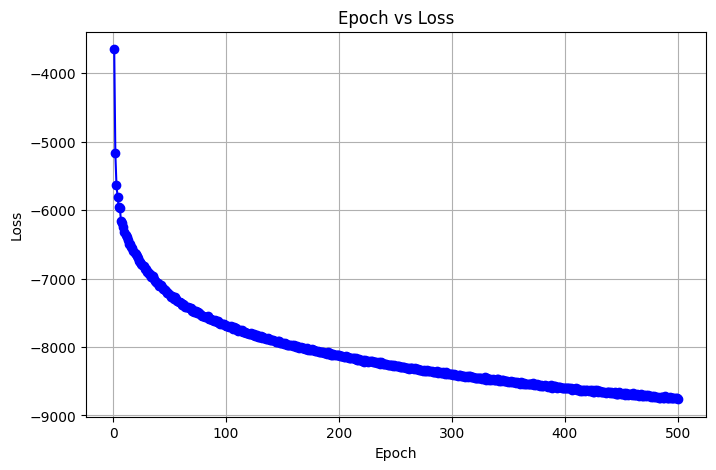

In [45]:
n_epochs = 500  # Set the number of epochs
train(model, dataloader, optimizer, n_epochs)

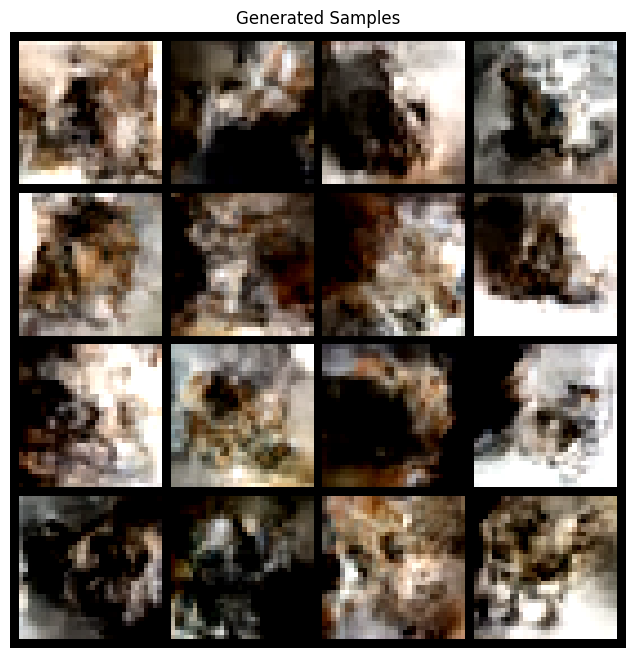

In [52]:
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from model import Glow

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def calc_z_shapes(n_channel, input_size, n_flow, n_block):
    z_shapes = []
    for i in range(n_block - 1):
        input_size //= 2
        n_channel *= 2
        z_shapes.append((n_channel, input_size, input_size))
    input_size //= 2
    z_shapes.append((n_channel * 4, input_size, input_size))
    return z_shapes

def load_model(path, n_flow=16, n_block=3, affine=True, conv_lu=True):
    model = Glow(3, n_flow, n_block, affine=affine, conv_lu=conv_lu).to(device)
    checkpoint = torch.load(path, map_location=device)
    model.load_state_dict(checkpoint['model'])
    model.eval()
    return model

def generate_z_samples(z_shapes, n_sample=16, temperature=0.7):
    z_sample = []
    for shape in z_shapes:
        z = torch.randn(n_sample, *shape).to(device) * temperature
        z_sample.append(z)
    return z_sample

def show_images(images, save_path=None):
    images = (images + 0.5).clamp(0, 1)
    grid = vutils.make_grid(images.cpu(), nrow=4)
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title("Generated Samples")
    plt.imshow(grid.permute(1, 2, 0))
    if save_path:
        plt.savefig(save_path)
    plt.show()

# ------------------------ USE HERE ------------------------

n_flow = 8
n_block = 3
img_size = 32
model_path = "glow_final_model_cifar.pt"

model = load_model(model_path, n_flow=n_flow, n_block=n_block)
z_shapes = calc_z_shapes(3, img_size, n_flow, n_block)

# Generate and reverse
z_sample = generate_z_samples(z_shapes, n_sample=16, temperature=0.7)
with torch.no_grad():
    samples = model.reverse(z_sample)

# Display
show_images(samples, save_path="generated_samples_cifar.png")
